In [23]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from tqdm.notebook import tqdm 

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [5]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
mnist_test = datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [6]:
X_train = mnist_train.data.numpy().reshape(-1, 28*28) / 255.0 
Y_train = mnist_train.targets.numpy()

X_test = mnist_test.data.numpy().reshape(-1, 28*28) / 255.0
Y_test = mnist_test.targets.numpy()

# Variamos el hiperparametro C

In [7]:
C_values = [0.01, 0.1, 1, 10, 100]

accuracies = []

for C in C_values:
    svm_model = SVC(C=C, kernel='rbf', gamma='scale')
    svm_model.fit(X_train, Y_train)

    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    accuracies.append(acc)

    print(f"C={C} | Accuracy: {acc:.4f} |")

C=0.01 | Accuracy: 0.9257 |
C=0.1 | Accuracy: 0.9595 |
C=1 | Accuracy: 0.9792 |
C=10 | Accuracy: 0.9837 |
C=100 | Accuracy: 0.9833 |


# Variamos el kernel

In [8]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

accuracies = []

for K in kernels:
    svm_model = SVC(C=10, kernel=K, gamma='scale')
    svm_model.fit(X_train, Y_train)

    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    accuracies.append(acc)

    print(f"Kernel={K} | Accuracy: {acc:.4f} |")

Kernel=linear | Accuracy: 0.9312 |
Kernel=rbf | Accuracy: 0.9837 |
Kernel=poly | Accuracy: 0.9786 |
Kernel=sigmoid | Accuracy: 0.7624 |


# Variamos el gamma

In [10]:
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
accuracies = []
for g in gammas:
    svm_model = SVC(C=10, kernel='rbf', gamma=g)
    svm_model.fit(X_train, Y_train) 

    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    accuracies.append(acc)

    print(f"Gamma ={g} | Accuracy: {acc:.4f} |")

Gamma =0.0001 | Accuracy: 0.9365 |
Gamma =0.001 | Accuracy: 0.9576 |
Gamma =0.01 | Accuracy: 0.9833 |
Gamma =0.1 | Accuracy: 0.9569 |
Gamma =1 | Accuracy: 0.2150 |


# Grid Search

In [14]:
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

svc_model = SVC(kernel='rbf')
random_search = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_dist,
    n_iter=10, 
    scoring='accuracy',
    return_train_score=True,
    random_state=42,
    cv=5
)
random_search.fit(X_train, Y_train)
print("Mejor accuracy en validación:", random_search.best_score_)
print("Mejores hiperparámetros:", random_search.best_params_)

Mejor accuracy en validación: 0.9802166666666666
Mejores hiperparámetros: {'gamma': 0.01, 'C': 100}


# Mejor modelo

In [16]:
svm_model = SVC(C=10, kernel='rbf', gamma=0.01)
svm_model.fit(X_train, Y_train) 
y_pred = svm_model.predict(X_test)

In [20]:
acc = accuracy_score(Y_test, y_pred)
print(acc)

0.9833


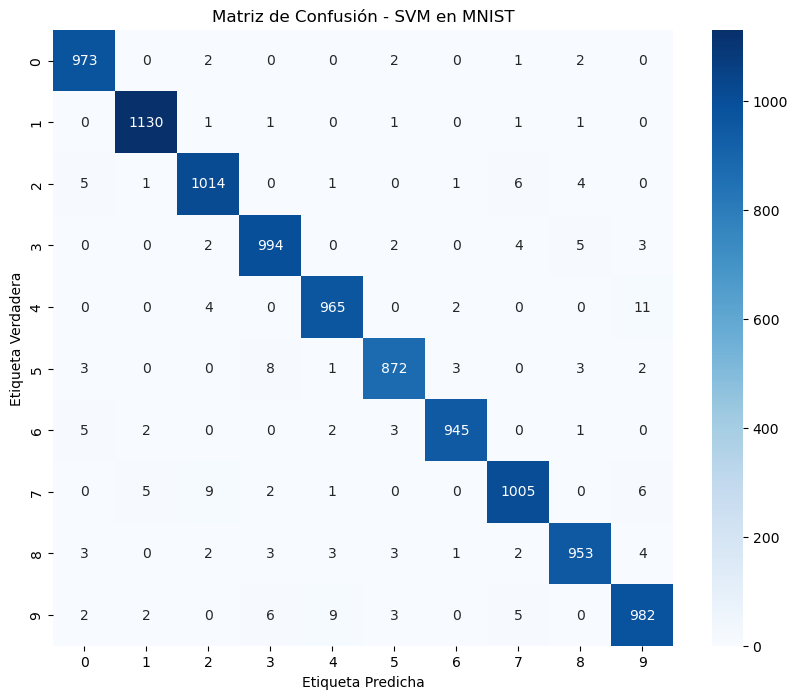

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión - SVM en MNIST")
plt.show()

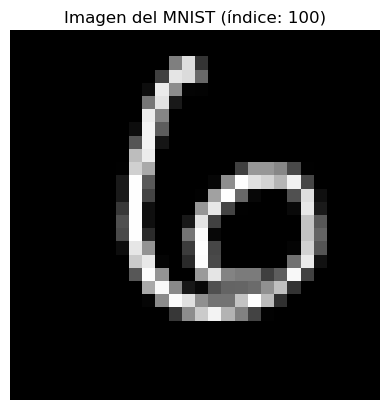

Clase real: 6
Predicción del modelo SVM: 6


In [18]:
idx = 100
img = X_test[idx].reshape(28, 28)
true_label = Y_test[idx]

plt.imshow(img, cmap='gray')
plt.title("Imagen del MNIST (índice: {})".format(idx))
plt.axis('off')
plt.show()

pred_label = svm_model.predict(X_test[idx].reshape(1, -1))[0]

print(f"Clase real: {true_label}")
print(f"Predicción del modelo SVM: {pred_label}")